### Importing libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

### Importing details of officials

In [2]:
presidents_tweets = pd.read_csv('tweets_of_presidents_one_year.csv')
presidents_tweets

,Created_date,Favorite_count,Hashtags,Retweet_count,Source,Tweet,Tweet_ID,User_Mentions,User_Name
0,2020-07-15 16:52:14,28,"[{'text': 'COVID19', 'indices': [57, 65]}]",13,Twitter for Android,"b""Ministerial Statement: Minister of Health Li...",1283444273149620224,[],@EswatiniGovern1
1,2020-07-15 09:28:11,9,[],2,Twitter Web App,b'Ambassador Aragones: \xe2\x80\x9cWhen this p...,1283332522777157632,[],@EswatiniGovern1
2,2020-07-15 09:28:10,11,"[{'text': 'COVID19', 'indices': [95, 103]}]",2,Twitter Web App,b'Ambassador Aragones: \xe2\x80\x9cThis assist...,1283332518964600839,[],@EswatiniGovern1
3,2020-07-15 09:28:09,3,[],0,Twitter Web App,b'PM: \xe2\x80\x9cThis support is significant ...,1283332516586422273,[],@EswatiniGovern1
4,2020-07-15 09:28:08,4,[],0,Twitter Web App,b'Prime Minister: \xe2\x80\x9cThe EU is showin...,1283332512966680578,[],@EswatiniGovern1
...,...,...,...,...,...,...,...,...,...
23089,2020-03-28 17:51:05,13,[],10,Twitter Web App,b'Pour toute information sur coronavirus consu...,1243958803453878273,[],@MSPS_Togo
23090,2020-03-23 10:40:49,47,[],16,Twitter Web App,b'Le premier cas confirm\xc3\xa9 de coronaviru...,1242038584112185344,[],@MSPS_Togo
23091,2020-03-17 11:50:11,2,[],0,Twitter Web App,b'https://t.co/QhnGix1V7f',1239881713922211840,[],@MSPS_Togo
23092,2020-03-17 11:48:52,25,[],17,Twitter Web App,b'Manifestations coronavirus https://t.co/mdjy...,1239881384732344325,[],@MSPS_Togo


In [3]:
most_used_hashtags = presidents_tweets[['User_Name','Hashtags', 'Favorite_count','Retweet_count' ]]


### The most used hashtags in tweets by top government officials

In [4]:
with pd.option_context('mode.chained_assignment', None):
    most_used_hashtags['hashtags_clean'] = most_used_hashtags['Hashtags'].apply(lambda x: x.split(',')[0].split(':')[-1])


In [5]:
most_used_hashtags

,User_Name,Hashtags,Favorite_count,Retweet_count,hashtags_clean
0,@EswatiniGovern1,"[{'text': 'COVID19', 'indices': [57, 65]}]",28,13,'COVID19'
1,@EswatiniGovern1,[],9,2,[]
2,@EswatiniGovern1,"[{'text': 'COVID19', 'indices': [95, 103]}]",11,2,'COVID19'
3,@EswatiniGovern1,[],3,0,[]
4,@EswatiniGovern1,[],4,0,[]
...,...,...,...,...,...
23089,@MSPS_Togo,[],13,10,[]
23090,@MSPS_Togo,[],47,16,[]
23091,@MSPS_Togo,[],2,0,[]
23092,@MSPS_Togo,[],25,17,[]


In [6]:
most_used_hashtags['hashtags_clean'].value_counts().reset_index()

,index,hashtags_clean
0,[],14777
1,'Ramaphosa',1079
2,'Burundi',1001
3,'COVID19',949
4,'RDC',642
...,...,...
1380,'13Mai',1
1381,'EveryWomanEveryChild',1
1382,'M7Trek',1
1383,'AddisAbeba',1


### Getting the hashtags from the top 10 retweets of the officials

In [8]:
retweets = presidents_tweets.loc[presidents_tweets.Tweet.str.contains(r'RT\s@', regex=True, na=False)].reset_index(drop=True)
retweets

,Created_date,Favorite_count,Hashtags,Retweet_count,Source,Tweet,Tweet_ID,User_Mentions,User_Name
0,2020-07-07 15:51:33,0,"[{'text': 'HIV', 'indices': [121, 125]}]",35,Twitter for Android,b'RT @TW_Eswatini: We congratulate His Majesty...,1280529900127105025,"[{'screen_name': 'TW_Eswatini', 'name': 'Taiwa...",@EswatiniGovern1
1,2020-07-07 13:10:30,0,"[{'text': 'HIV', 'indices': [42, 46]}, {'text'...",66,Twitter for Android,b'RT @UEswatini: Despite having the highest #H...,1280489368491307008,"[{'screen_name': 'UEswatini', 'name': 'UNEswat...",@EswatiniGovern1
2,2020-07-07 11:55:54,0,[],14,Twitter for Android,b'RT @_AfricaTimes: South Africa\xe2\x80\x99s ...,1280470595256430595,"[{'screen_name': '_AfricaTimes', 'name': 'Afri...",@EswatiniGovern1
3,2020-06-22 20:25:21,0,[],25,Twitter for Android,b'RT @PholileShakantu: Today I received 5000 d...,1275162982826291202,"[{'screen_name': 'PholileShakantu', 'name': 'P...",@EswatiniGovern1
4,2020-06-11 06:31:12,0,[],23,Twitter for Android,"b'RT @BEswatini: Today, Business Eswatini happ...",1270966795256631297,"[{'screen_name': 'BEswatini', 'name': 'Busines...",@EswatiniGovern1
...,...,...,...,...,...,...,...,...,...
4774,2019-12-22 20:52:41,0,[],29,Twitter for Android,b'RT @LioMdX: #2019 en Noir et Blanc avec le @...,1208852883908780032,"[{'screen_name': 'LioMdX', 'name': 'Lionel Man...",@Macky_Sall
4775,2019-12-07 11:39:37,0,[],40,Twitter Web App,b'RT @PR_Senegal: Retour en images sur les gra...,1203277880937107456,"[{'screen_name': 'PR_Senegal', 'name': 'Présid...",@Macky_Sall
4776,2019-11-20 17:05:12,0,"[{'text': 'industrialisation', 'indices': [38,...",38,Twitter Web App,b'RT @PR_Senegal: Journ\xc3\xa9e mondiale de l...,1197199225056059395,"[{'screen_name': 'PR_Senegal', 'name': 'Présid...",@Macky_Sall
4777,2019-07-07 14:44:33,0,"[{'text': 'Niamey', 'indices': [35, 42]}]",55,Twitter for iPhone,b'RT @PR_Senegal: R\xc3\xa9unie en sommet \xc3...,1147879077048700928,"[{'screen_name': 'PR_Senegal', 'name': 'Présid...",@Macky_Sall


In [9]:
retweeted = retweets[['User_Name','Favorite_count','Hashtags','Retweet_count','Tweet']]
retweeted

,User_Name,Favorite_count,Hashtags,Retweet_count,Tweet
0,@EswatiniGovern1,0,"[{'text': 'HIV', 'indices': [121, 125]}]",35,b'RT @TW_Eswatini: We congratulate His Majesty...
1,@EswatiniGovern1,0,"[{'text': 'HIV', 'indices': [42, 46]}, {'text'...",66,b'RT @UEswatini: Despite having the highest #H...
2,@EswatiniGovern1,0,[],14,b'RT @_AfricaTimes: South Africa\xe2\x80\x99s ...
3,@EswatiniGovern1,0,[],25,b'RT @PholileShakantu: Today I received 5000 d...
4,@EswatiniGovern1,0,[],23,"b'RT @BEswatini: Today, Business Eswatini happ..."
...,...,...,...,...,...
4774,@Macky_Sall,0,[],29,b'RT @LioMdX: #2019 en Noir et Blanc avec le @...
4775,@Macky_Sall,0,[],40,b'RT @PR_Senegal: Retour en images sur les gra...
4776,@Macky_Sall,0,"[{'text': 'industrialisation', 'indices': [38,...",38,b'RT @PR_Senegal: Journ\xc3\xa9e mondiale de l...
4777,@Macky_Sall,0,"[{'text': 'Niamey', 'indices': [35, 42]}]",55,b'RT @PR_Senegal: R\xc3\xa9unie en sommet \xc3...


In [10]:
retweets_grouped = retweeted.groupby('User_Name')
retweets_grouped

In [11]:
new_retweets = retweets_grouped.apply(lambda x: x.sort_values('Retweet_count', ascending=False)).reset_index(drop=True)
new_retweets.index.name = None
newer_retweets = new_retweets.groupby('User_Name').head(10)
newer_retweets

,User_Name,Favorite_count,Hashtags,Retweet_count,Tweet
0,@AOuattara_PRCI,0,"[{'text': 'StopCovid19Civ', 'indices': [20, 35...",259,"b""RT @HamedBakayoko1: #StopCovid19Civ\n\xe2\x9..."
1,@AOuattara_PRCI,0,[],131,b'RT @Presidenceci: AGENDA DU CHEF DE L\xe2\x8...
2,@AOuattara_PRCI,0,[],91,b'RT @Presidenceci: https://t.co/afVZYLw6Lm'
3,@AOuattara_PRCI,0,[],79,b'RT @Presidenceci: La r\xc3\xa9ouverture des ...
4,@AOuattara_PRCI,0,[],60,b'RT @Presidenceci: Les mesures de restriction...
...,...,...,...,...,...
2178,@willynyamitwe,0,[],1481,b'RT @MagufuliJP: Nimeshtushwa na taarifa za k...
2179,@willynyamitwe,0,[],1454,b'RT @SecPompeo: We salute the people of Burun...
2180,@willynyamitwe,0,[],1148,b'RT @MagufuliJP: Nakupongeza Ndg. Evariste Nd...
2181,@willynyamitwe,0,[],1134,b'RT @MBuhari: It is with profound grief and s...


In [12]:
with pd.option_context('mode.chained_assignment', None):
    newer_retweets['hashtags_clean'] = newer_retweets['Hashtags'].apply(lambda x: x.split(',')[0].split(':')[-1])


In [13]:
newer_retweets

,User_Name,Favorite_count,Hashtags,Retweet_count,Tweet,hashtags_clean
0,@AOuattara_PRCI,0,"[{'text': 'StopCovid19Civ', 'indices': [20, 35...",259,"b""RT @HamedBakayoko1: #StopCovid19Civ\n\xe2\x9...",'StopCovid19Civ'
1,@AOuattara_PRCI,0,[],131,b'RT @Presidenceci: AGENDA DU CHEF DE L\xe2\x8...,[]
2,@AOuattara_PRCI,0,[],91,b'RT @Presidenceci: https://t.co/afVZYLw6Lm',[]
3,@AOuattara_PRCI,0,[],79,b'RT @Presidenceci: La r\xc3\xa9ouverture des ...,[]
4,@AOuattara_PRCI,0,[],60,b'RT @Presidenceci: Les mesures de restriction...,[]
...,...,...,...,...,...,...
2178,@willynyamitwe,0,[],1481,b'RT @MagufuliJP: Nimeshtushwa na taarifa za k...,[]
2179,@willynyamitwe,0,[],1454,b'RT @SecPompeo: We salute the people of Burun...,[]
2180,@willynyamitwe,0,[],1148,b'RT @MagufuliJP: Nakupongeza Ndg. Evariste Nd...,[]
2181,@willynyamitwe,0,[],1134,b'RT @MBuhari: It is with profound grief and s...,[]


In [14]:
hashtags_presidents = newer_retweets[['hashtags_clean', 'User_Name']]
hashtags_presidents

,hashtags_clean,User_Name
0,'StopCovid19Civ',@AOuattara_PRCI
1,[],@AOuattara_PRCI
2,[],@AOuattara_PRCI
3,[],@AOuattara_PRCI
4,[],@AOuattara_PRCI
...,...,...
2178,[],@willynyamitwe
2179,[],@willynyamitwe
2180,[],@willynyamitwe
2181,[],@willynyamitwe


In [15]:
newest = newer_retweets.hashtags_clean.value_counts()
newest

[]                  162
 'COVID19'           14
 'السودان'            2
 'Coronavirus'        2
 'COVID19Gambia'      2
                   ... 
 'ECOT'               1
 'EUCO'               1
 'RussiaAfrica'       1
 'Benin'              1
 'Eritrean'           1
Name: hashtags_clean, Length: 75, dtype: int64

In [36]:
more_hashtags = hashtags_presidents.groupby('hashtags_clean',as_index=False).count()
unique_hashtags = more_hashtags.sort_values('User_Name', ascending=False).reset_index(drop=True)
unique_hashtags = unique_hashtags[1:6]
unique_hashtags['Fraction'] = unique_hashtags['User_Name'] / 36
unique_hashtags

,hashtags_clean,User_Name,Fraction
1,'COVID19',14,0.388889
2,'Coronavirus',2,0.055556
3,'السودان',2,0.055556
4,'SouthSudan',2,0.055556
5,'SADC',2,0.055556


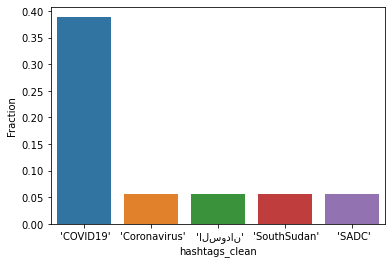

In [35]:
ax = sns.barplot(x="hashtags_clean", y="Fraction", data=unique_hashtags)

### Importing tweets of influencers

In [21]:
influencers_tweets = pd.read_csv('tweets_of_influencers_one_year.csv')
influencers_tweets

,Created_date,Favorite_count,Hashtags,Retweet_count,Source,Tweet,Tweet_ID,User_Mentions,User_Name
0,2020-07-13 19:41:02,20649,[],2730,TweetDeck,b'Actual video footage of me starting off the ...,1282761976343662593,[],@Trevornoah
1,2020-07-11 22:07:04,0,[],92777,Twitter Web App,b'RT @KingBach: https://t.co/Sj2sVP7Gdt',1282073950843858944,"[{'screen_name': 'KingBach', 'name': 'King Bac...",@Trevornoah
2,2020-07-07 14:50:30,43315,[],5993,Twitter Web App,b'When white people take \xe2\x80\x9cbeing an ...,1280514534155923459,[],@Trevornoah
3,2020-07-06 21:54:14,14650,[],1635,Twitter Web App,b'Me at the restaurant after things return to ...,1280258784485572611,[],@Trevornoah
4,2020-06-26 17:02:37,0,[],403,Twitter for iPhone,b'RT @franklinleonard: \xe2\x80\x9cI have rape...,1276561514456113152,"[{'screen_name': 'franklinleonard', 'name': 'F...",@Trevornoah
...,...,...,...,...,...,...,...,...,...
123605,2019-07-14 15:36:11,5,[],0,Twitter Web Client,b'\xe2\x80\x9cI don\xe2\x80\x99t know why I\xe...,1150428788989161472,[],@gettleman
123606,2019-07-14 03:26:42,0,[],26,Twitter for iPhone,b'RT @scroll_in: Elephants in India are changi...,1150245206135984128,"[{'screen_name': 'scroll_in', 'name': 'scroll....",@gettleman
123607,2019-07-11 02:53:05,4,[],0,Twitter Web Client,b'we should ALL do more burpees. https://t.co/...,1149149581801693185,[],@gettleman
123608,2019-07-11 02:52:19,0,[],23,Twitter Web Client,b'RT @halbfinger: Liberal U.S. Jews complain t...,1149149391145451520,"[{'screen_name': 'halbfinger', 'name': 'David ...",@gettleman


In [22]:
retweets_influencers = influencers_tweets.loc[influencers_tweets.Tweet.str.contains(r'RT\s@', regex=True, na=False)].reset_index(drop=True)
retweets_influencers

,Created_date,Favorite_count,Hashtags,Retweet_count,Source,Tweet,Tweet_ID,User_Mentions,User_Name
0,2020-07-11 22:07:04,0,[],92777,Twitter Web App,b'RT @KingBach: https://t.co/Sj2sVP7Gdt',1282073950843858944,"[{'screen_name': 'KingBach', 'name': 'King Bac...",@Trevornoah
1,2020-06-26 17:02:37,0,[],403,Twitter for iPhone,b'RT @franklinleonard: \xe2\x80\x9cI have rape...,1276561514456113152,"[{'screen_name': 'franklinleonard', 'name': 'F...",@Trevornoah
2,2020-06-26 14:55:34,0,[],56888,Twitter for iPhone,b'RT @SawyerHackett: Never would have thought ...,1276529543289942016,"[{'screen_name': 'SawyerHackett', 'name': 'Saw...",@Trevornoah
3,2020-06-25 20:14:51,0,[],102293,Twitter for iPhone,b'RT @Sensational_Dre: So a person with a felo...,1276247505450270720,"[{'screen_name': 'Sensational_Dre', 'name': 'R...",@Trevornoah
4,2020-06-25 16:56:40,0,[],161675,Twitter for iPhone,b'RT @maleeezy_: a story in two parts: https:/...,1276197629794410498,"[{'screen_name': 'maleeezy_', 'name': 'MB', 'i...",@Trevornoah
...,...,...,...,...,...,...,...,...,...
35363,2019-07-15 15:23:36,0,[],767,Twitter Web Client,b'RT @IndianExpress: Rainbow in Srinagar. (Exp...,1150788010625007617,"[{'screen_name': 'IndianExpress', 'name': 'The...",@gettleman
35364,2019-07-15 10:12:23,0,"[{'text': 'Chandrayaan2', 'indices': [39, 52]}]",1,Twitter Web Client,b'RT @AnkurRander: @gettleman Experience #Chan...,1150709689723703298,"[{'screen_name': 'AnkurRander', 'name': 'Ankur...",@gettleman
35365,2019-07-14 17:29:17,0,[],2,Twitter for iPhone,"b""RT @JCastaneda1212: You can't help but feel ...",1150457247996108801,"[{'screen_name': 'JCastaneda1212', 'name': 'Jo...",@gettleman
35366,2019-07-14 03:26:42,0,[],26,Twitter for iPhone,b'RT @scroll_in: Elephants in India are changi...,1150245206135984128,"[{'screen_name': 'scroll_in', 'name': 'scroll....",@gettleman


In [23]:
retweeted_influencers = retweets_influencers[['User_Name','Favorite_count','Hashtags','Retweet_count','Tweet']]
retweeted_influencers

,User_Name,Favorite_count,Hashtags,Retweet_count,Tweet
0,@Trevornoah,0,[],92777,b'RT @KingBach: https://t.co/Sj2sVP7Gdt'
1,@Trevornoah,0,[],403,b'RT @franklinleonard: \xe2\x80\x9cI have rape...
2,@Trevornoah,0,[],56888,b'RT @SawyerHackett: Never would have thought ...
3,@Trevornoah,0,[],102293,b'RT @Sensational_Dre: So a person with a felo...
4,@Trevornoah,0,[],161675,b'RT @maleeezy_: a story in two parts: https:/...
...,...,...,...,...,...
35363,@gettleman,0,[],767,b'RT @IndianExpress: Rainbow in Srinagar. (Exp...
35364,@gettleman,0,"[{'text': 'Chandrayaan2', 'indices': [39, 52]}]",1,b'RT @AnkurRander: @gettleman Experience #Chan...
35365,@gettleman,0,[],2,"b""RT @JCastaneda1212: You can't help but feel ..."
35366,@gettleman,0,[],26,b'RT @scroll_in: Elephants in India are changi...


In [24]:
retweets_grouped_influencers = retweeted_influencers.groupby('User_Name')
retweets_grouped_influencers

In [25]:
newer_retweets = retweets_grouped_influencers.apply(lambda x: x.sort_values('Retweet_count', ascending=False)).reset_index(drop=True)
newer_retweets.index.name = None
newest_retweets = newer_retweets.groupby('User_Name').head(10)
newest_retweets

,User_Name,Favorite_count,Hashtags,Retweet_count,Tweet
0,@5FM,0,"[{'text': 'shabbaday', 'indices': [38, 48]}]",2006,b'RT @siphiweshabba: 11:06:2010\xf0\x9f\x99\x8...
1,@5FM,0,"[{'text': 'EarlyMorningsWithKarabo', 'indices'...",30,b'RT @KaraboNtshweng: We\xe2\x80\x99re on!!!!!...
2,@5FM,0,"[{'text': 'URaMiracle', 'indices': [55, 66]}]",25,b'RT @DJZinhle: Live on @5FM in a few. Please ...
3,@5FM,0,"[{'text': 'SelectiveStyles', 'indices': [26, 4...",22,b'RT @KidFonque: On today\xe2\x80\x99s #Select...
4,@5FM,0,"[{'text': 'EarlyMorningsWithKarabo', 'indices'...",21,b'RT @KaraboNtshweng: Celebrating some awesome...
...,...,...,...,...,...
34851,@willintune,0,[],13232,b'RT @AdvBarryRoux: Durban SAPS caught a boy s...
34852,@willintune,0,[],13095,"b'RT @ellieelizaa: I rarely actually tweet, es..."
34853,@willintune,0,[],13000,b'RT @AbdirahimS: Eid Mubarak all\xe2\x9c\xa8\...
34854,@willintune,0,[],12939,b'RT @Dr2NisreenAlwan: Wow powerful and very s...


In [26]:
with pd.option_context('mode.chained_assignment', None):
    newest_retweets['hashtags_clean'] = newest_retweets['Hashtags'].apply(lambda x: x.split(',')[0].split(':')[-1])


In [27]:
newest_retweets

,User_Name,Favorite_count,Hashtags,Retweet_count,Tweet,hashtags_clean
0,@5FM,0,"[{'text': 'shabbaday', 'indices': [38, 48]}]",2006,b'RT @siphiweshabba: 11:06:2010\xf0\x9f\x99\x8...,'shabbaday'
1,@5FM,0,"[{'text': 'EarlyMorningsWithKarabo', 'indices'...",30,b'RT @KaraboNtshweng: We\xe2\x80\x99re on!!!!!...,'EarlyMorningsWithKarabo'
2,@5FM,0,"[{'text': 'URaMiracle', 'indices': [55, 66]}]",25,b'RT @DJZinhle: Live on @5FM in a few. Please ...,'URaMiracle'
3,@5FM,0,"[{'text': 'SelectiveStyles', 'indices': [26, 4...",22,b'RT @KidFonque: On today\xe2\x80\x99s #Select...,'SelectiveStyles'
4,@5FM,0,"[{'text': 'EarlyMorningsWithKarabo', 'indices'...",21,b'RT @KaraboNtshweng: Celebrating some awesome...,'EarlyMorningsWithKarabo'
...,...,...,...,...,...,...
34851,@willintune,0,[],13232,b'RT @AdvBarryRoux: Durban SAPS caught a boy s...,[]
34852,@willintune,0,[],13095,"b'RT @ellieelizaa: I rarely actually tweet, es...",[]
34853,@willintune,0,[],13000,b'RT @AbdirahimS: Eid Mubarak all\xe2\x9c\xa8\...,[]
34854,@willintune,0,[],12939,b'RT @Dr2NisreenAlwan: Wow powerful and very s...,[]


In [31]:
hashtags_influencers = newest_retweets[['hashtags_clean', 'User_Name']]
more_hashtags = hashtags_influencers.groupby('hashtags_clean',as_index=False).count()
unique_hashtags = more_hashtags.sort_values('User_Name', ascending=False).reset_index(drop=True)
unique_hashtags = unique_hashtags[1:6]
unique_hashtags['Fraction'] = unique_hashtags['User_Name'] / 93
unique_hashtags

,hashtags_clean,User_Name,Fraction
1,'COVID19',25,0.268817
2,'coronavirus',7,0.075269
3,'LWS2020KZN',6,0.064516
4,'Covid_19',4,0.043011
5,'BREAKING',3,0.032258


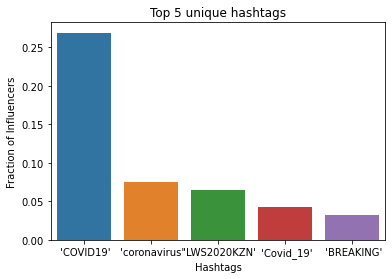

In [33]:
ax = sns.barplot(x="hashtags_clean", y="Fraction", data=unique_hashtags)
plt.title('Top 5 unique hashtags')
plt.xlabel('Hashtags')
plt.ylabel('Fraction of Influencers')
plt.savefig('hashtags_influencers.png', bbox_inches="tight", dpi=300)